# Import necessary libraries


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("C:\\Users\\user\\Downloads\\credit.csv")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [6]:
df.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                         float64
SSN                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [7]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# Exploratory Data Analysis (EDA)

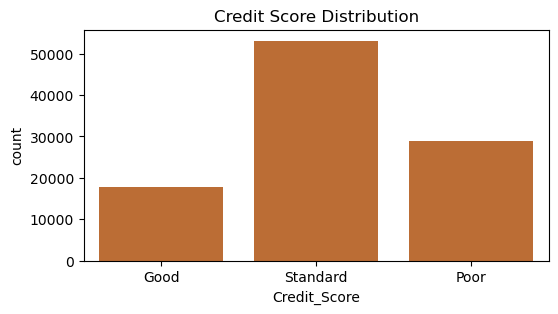

In [8]:
#creddit score distribution countplot
plt.figure(figsize=(6,3))
sns.countplot(x='Credit_Score', data=df, color='chocolate')
plt.title('Credit Score Distribution')
plt.show()

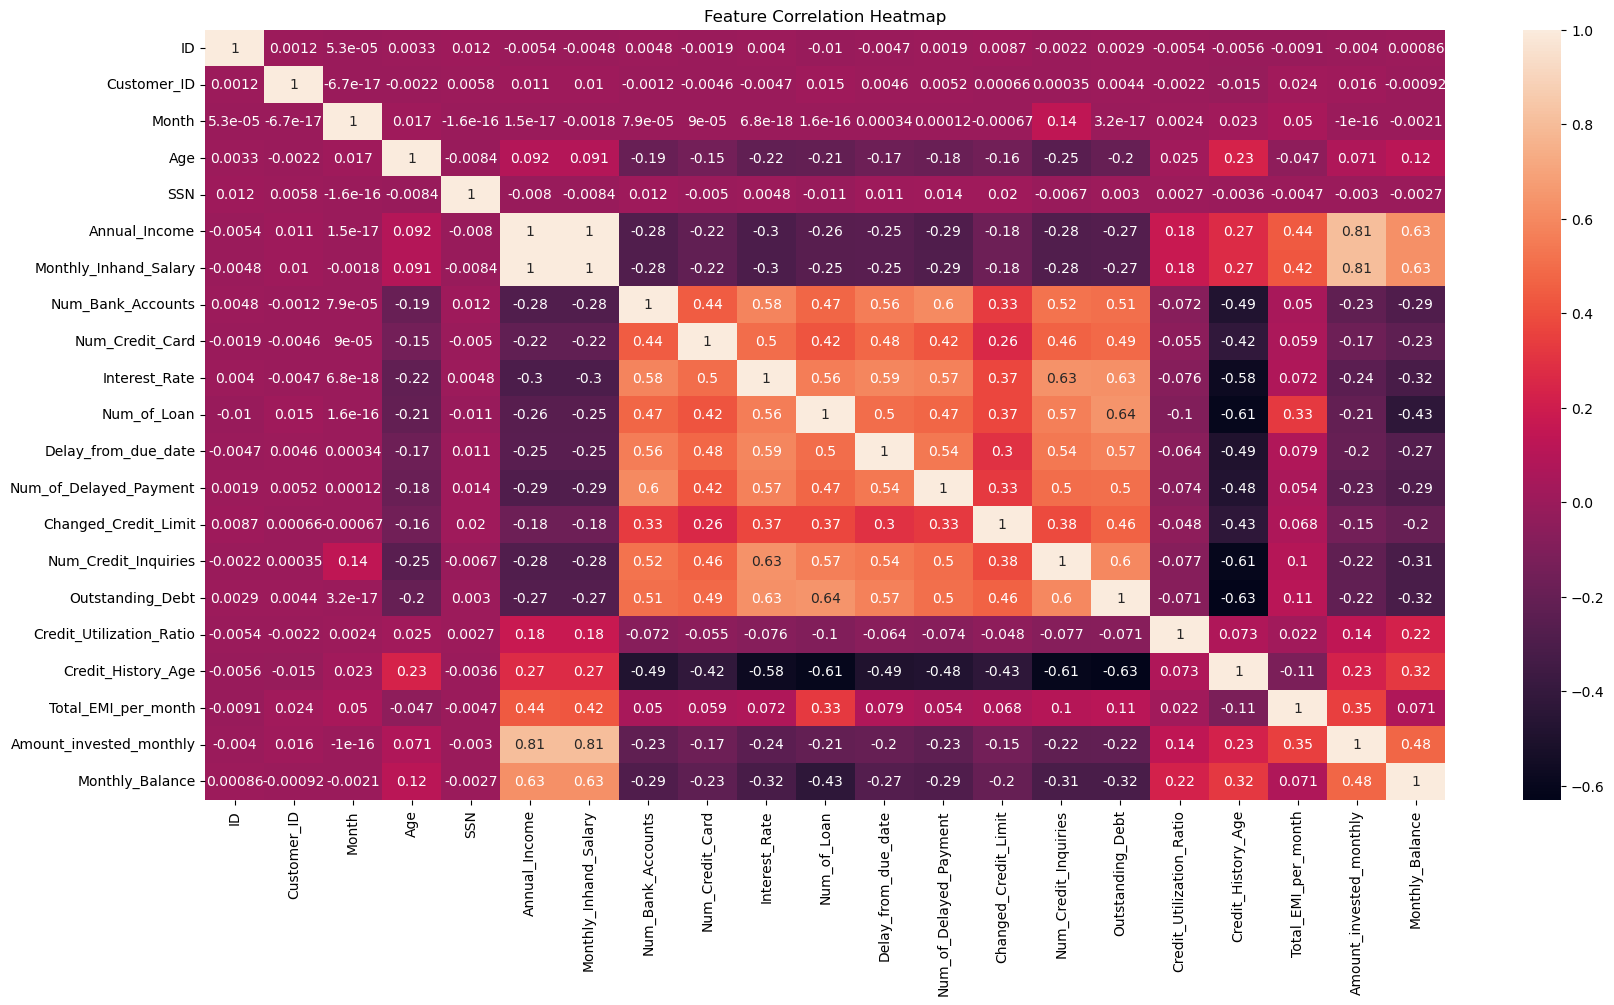

In [9]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Feature Correlation Heatmap')
plt.show()

In [10]:
df.drop('Annual_Income', axis=1)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,1824.843333,3.0,4.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,1824.843333,3.0,4.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,1824.843333,3.0,4.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,1824.843333,3.0,4.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,1824.843333,3.0,4.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,3359.415833,4.0,6.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,3359.415833,4.0,6.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,3359.415833,4.0,6.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,3359.415833,4.0,6.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [11]:
numerical_cols = ['Month','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
                  'Delay_from_due_date','Num_of_Delayed_Payment','Num_of_Loan', 'Credit_Utilization_Ratio',
                  'Changed_Credit_Limit','Credit_Utilization_Ratio','Outstanding_Debt','Credit_History_Age',
                  'Total_EMI_per_month', 'Amount_invested_monthly']

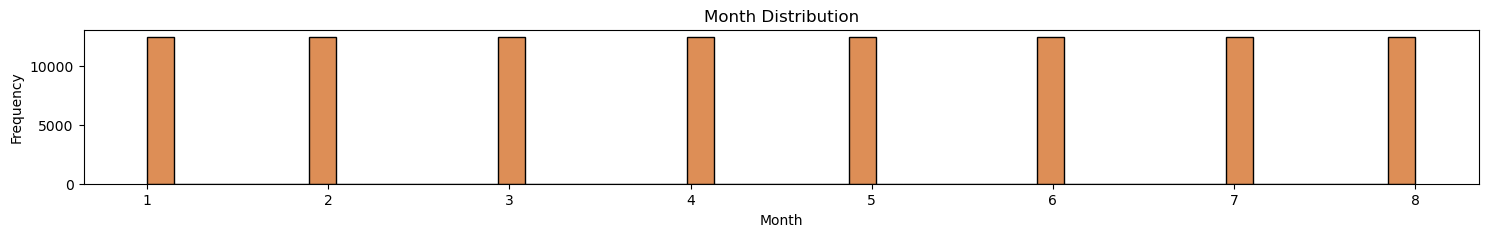

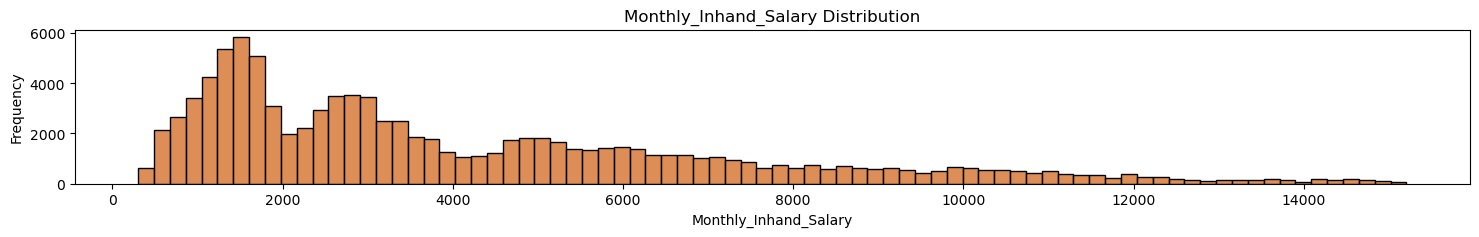

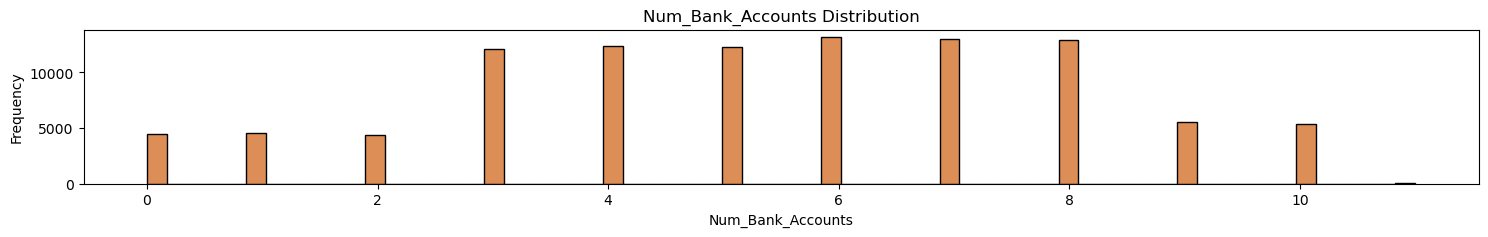

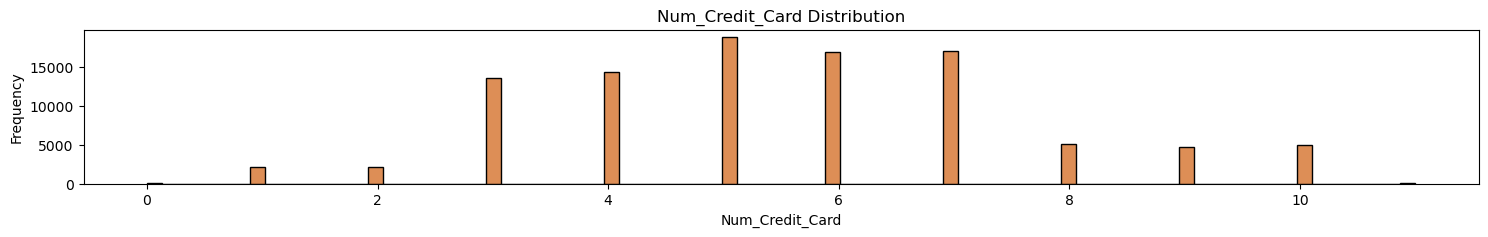

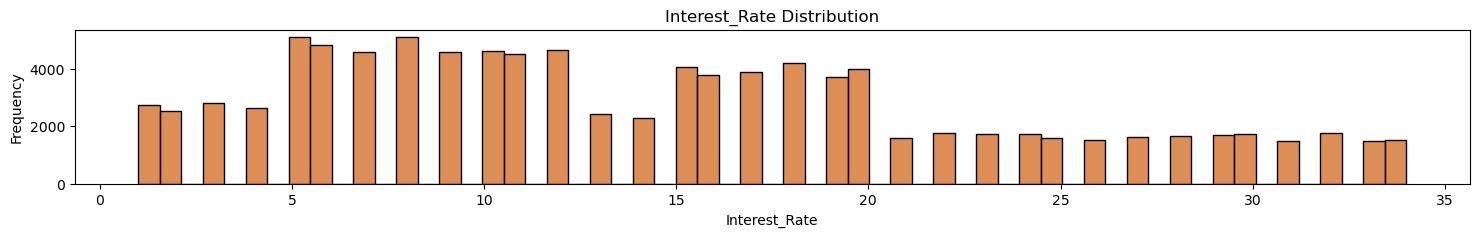

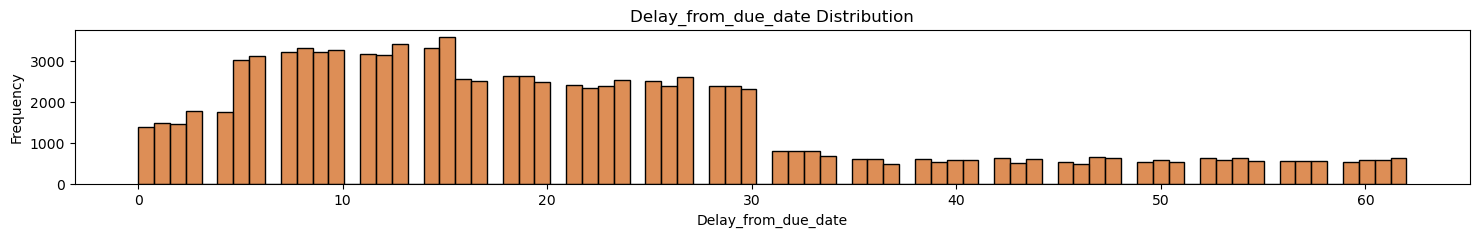

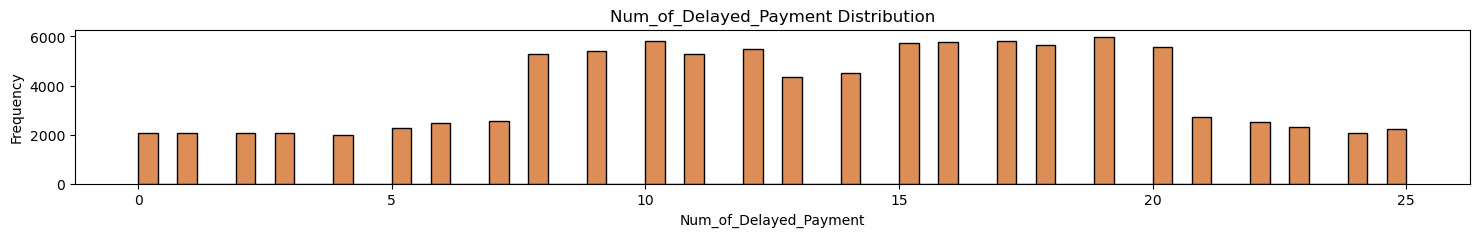

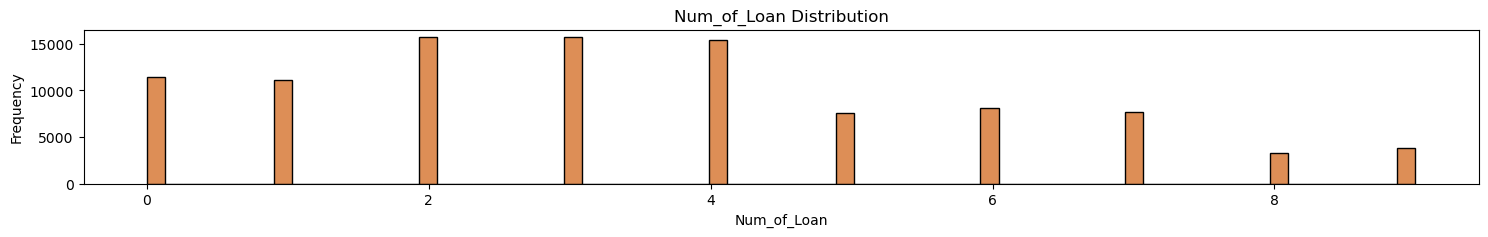

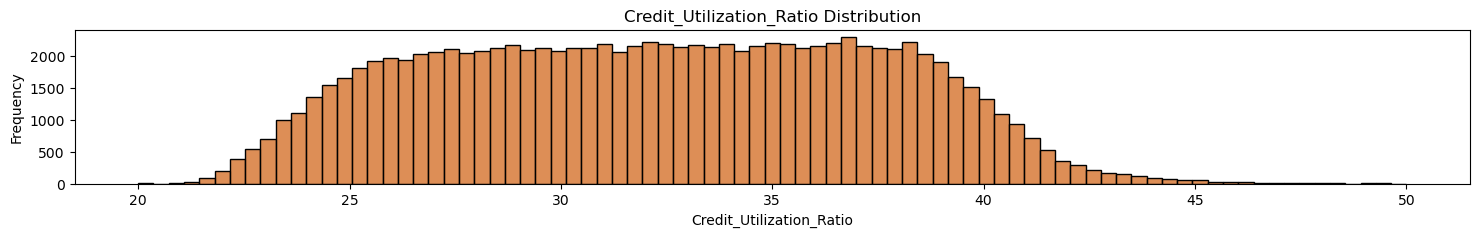

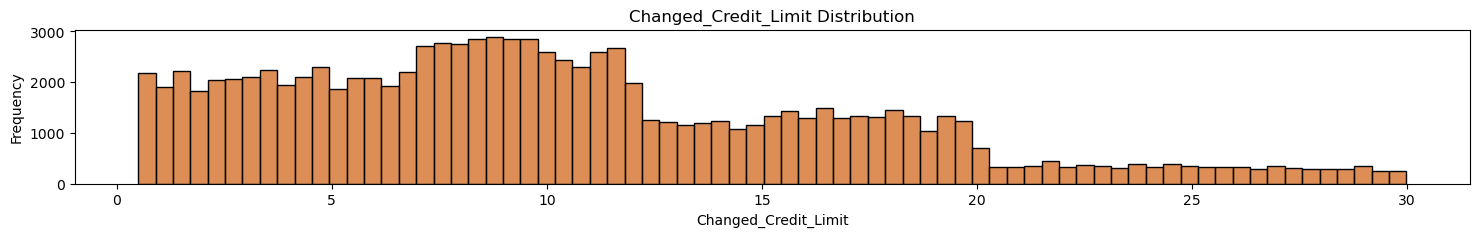

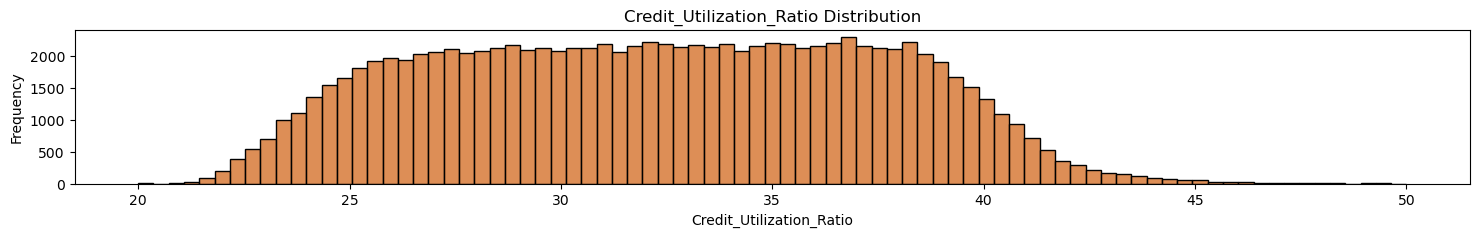

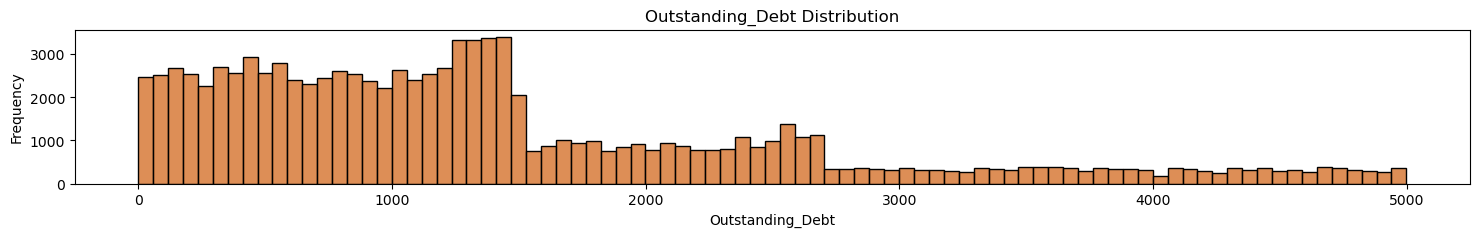

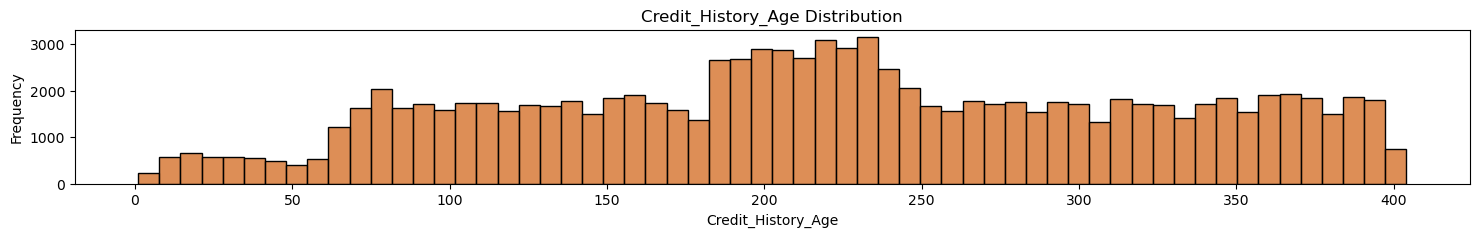

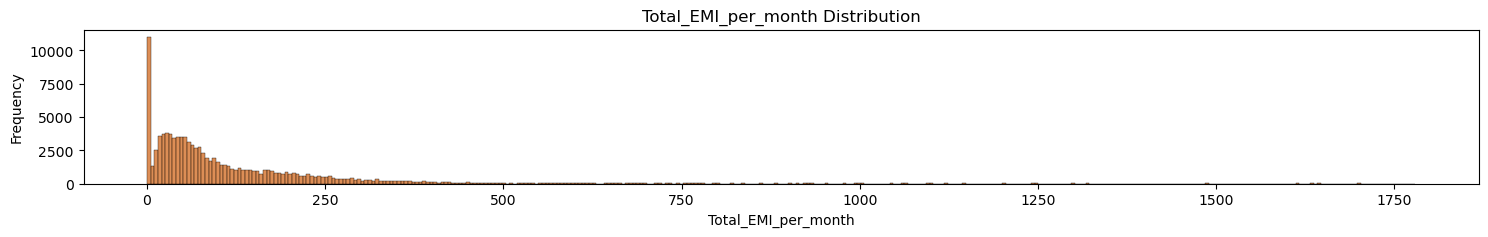

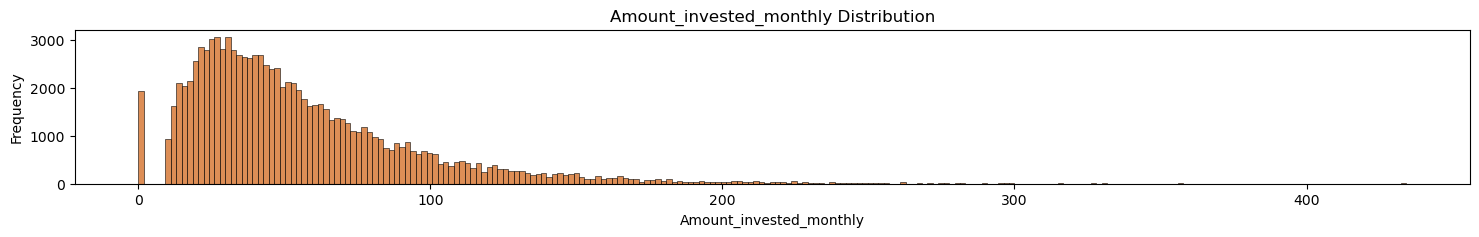

In [12]:
# Display histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(18,2))
    sns.histplot(df[col], kde=False, color='chocolate')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [13]:
categorical_cols = ['Occupation','Delay_from_due_date', 'Num_of_Delayed_Payment',
                    'Credit_Mix','Payment_Behaviour','Payment_of_Min_Amount']

In [15]:
for col in categorical_cols:
    vc = df[col].value_counts().rename_axis(col).reset_index(name='Counts')
    display(vc)

,Occupation,Counts
0,Lawyer,7096
1,Engineer,6864
2,Architect,6824
3,Mechanic,6776
4,Scientist,6744
5,Accountant,6744
6,Developer,6720
7,Media_Manager,6720
8,Teacher,6672
9,Entrepreneur,6648


,Delay_from_due_date,Counts
0,15.0,3596
1,13.0,3424
2,8.0,3324
3,14.0,3313
4,10.0,3281
...,...,...
58,59.0,528
59,39.0,525
60,43.0,502
61,46.0,490


,Num_of_Delayed_Payment,Counts
0,19.0,5982
1,17.0,5832
2,10.0,5802
3,16.0,5768
4,15.0,5724
5,18.0,5668
6,20.0,5584
7,12.0,5493
8,9.0,5399
9,8.0,5300


,Credit_Mix,Counts
0,Standard,45848
1,Good,30384
2,Bad,23768


,Payment_Behaviour,Counts
0,Low_spent_Small_value_payments,28616
1,High_spent_Medium_value_payments,19738
2,High_spent_Large_value_payments,14726
3,Low_spent_Medium_value_payments,14399
4,High_spent_Small_value_payments,11764
5,Low_spent_Large_value_payments,10757


,Payment_of_Min_Amount,Counts
0,Yes,52326
1,No,35667
2,NM,12007


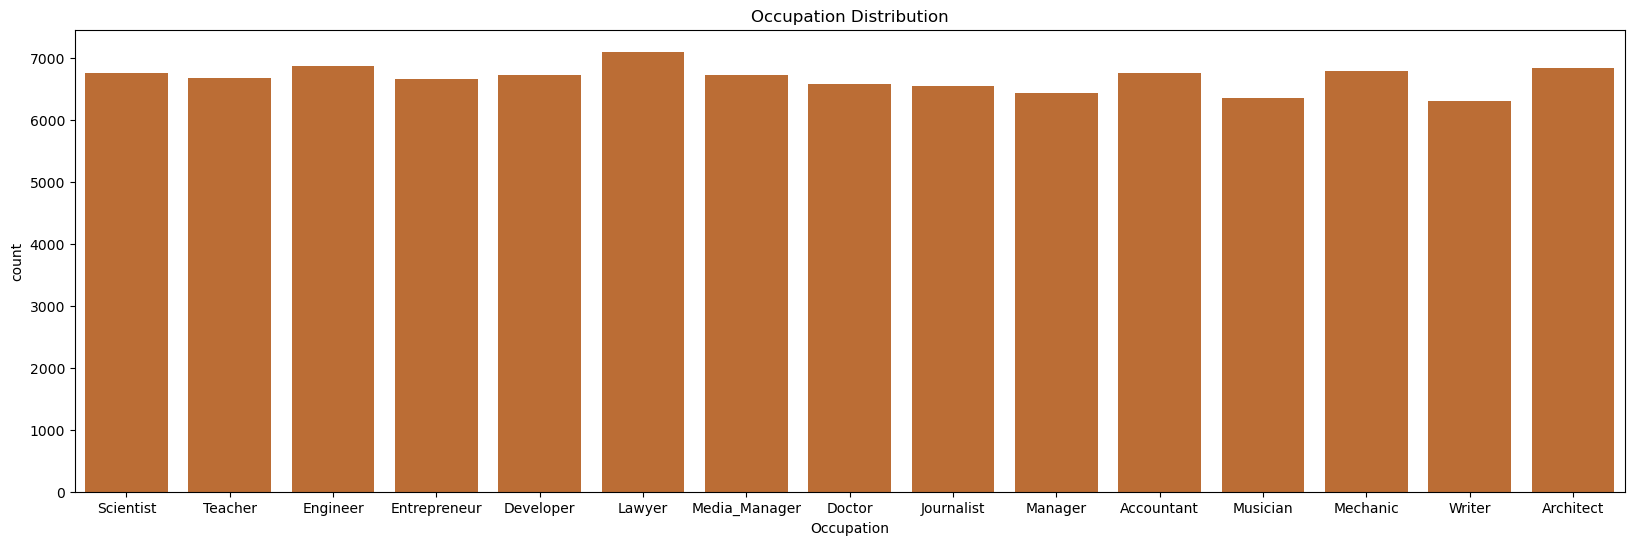

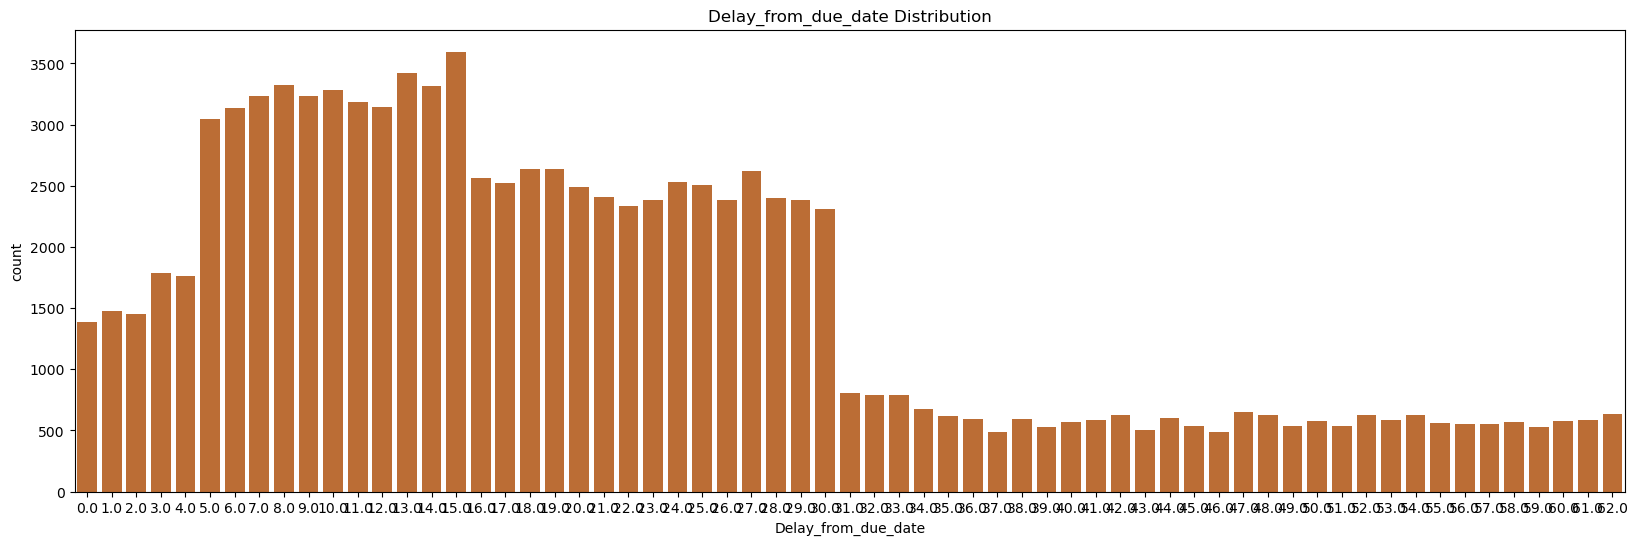

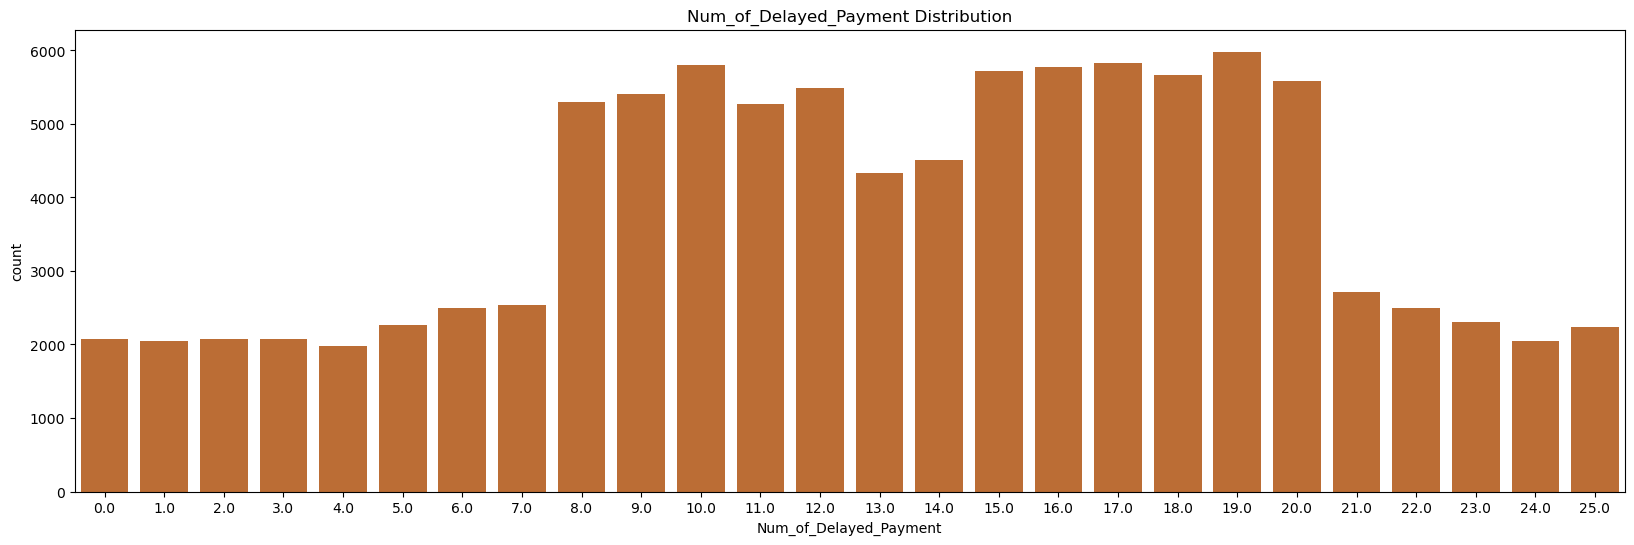

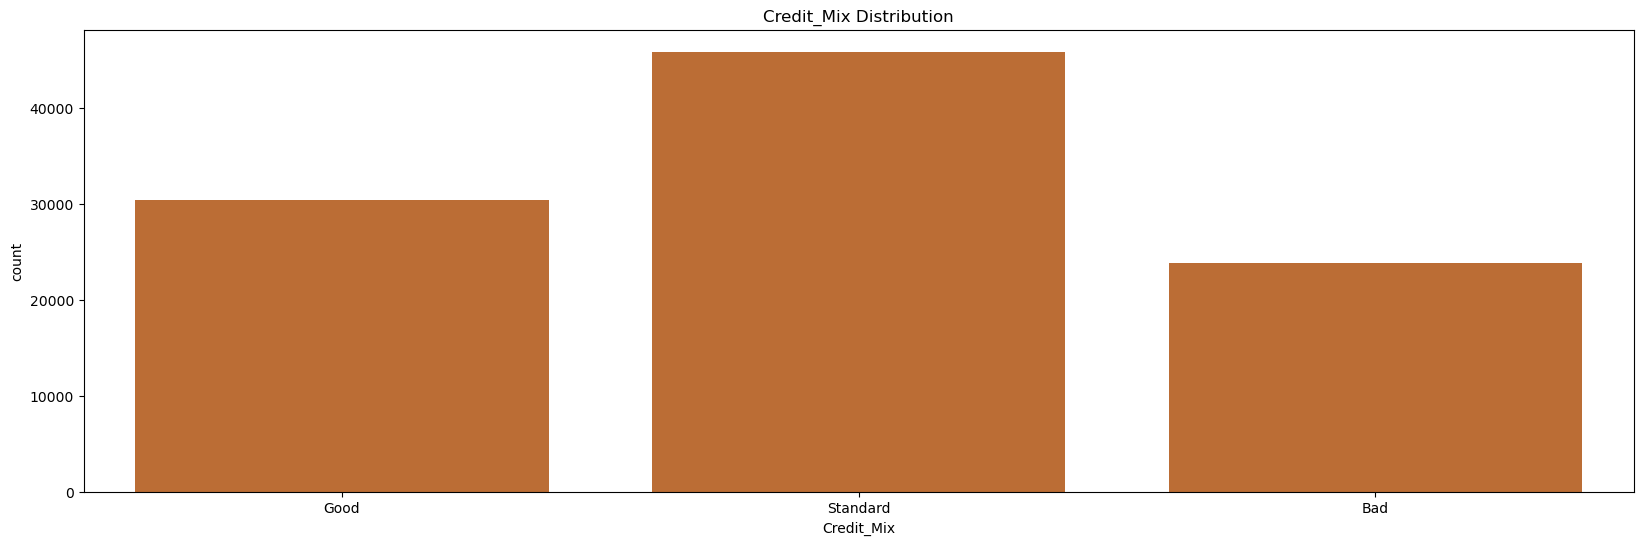

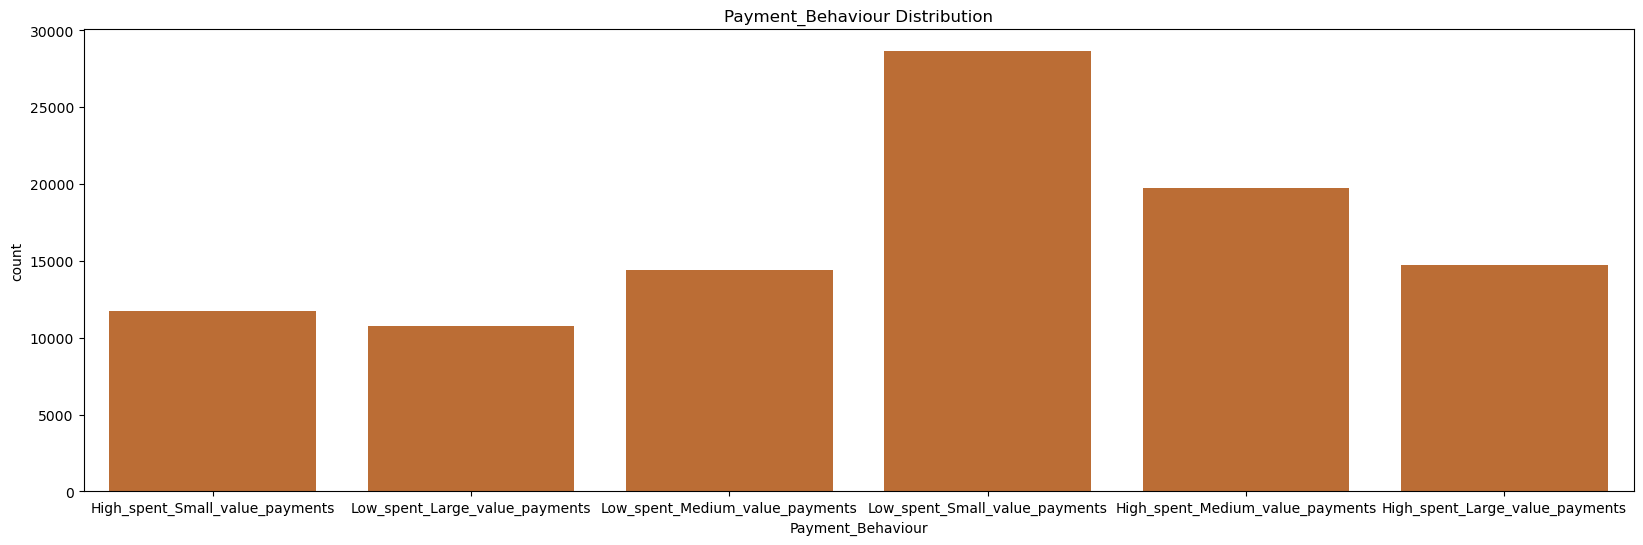

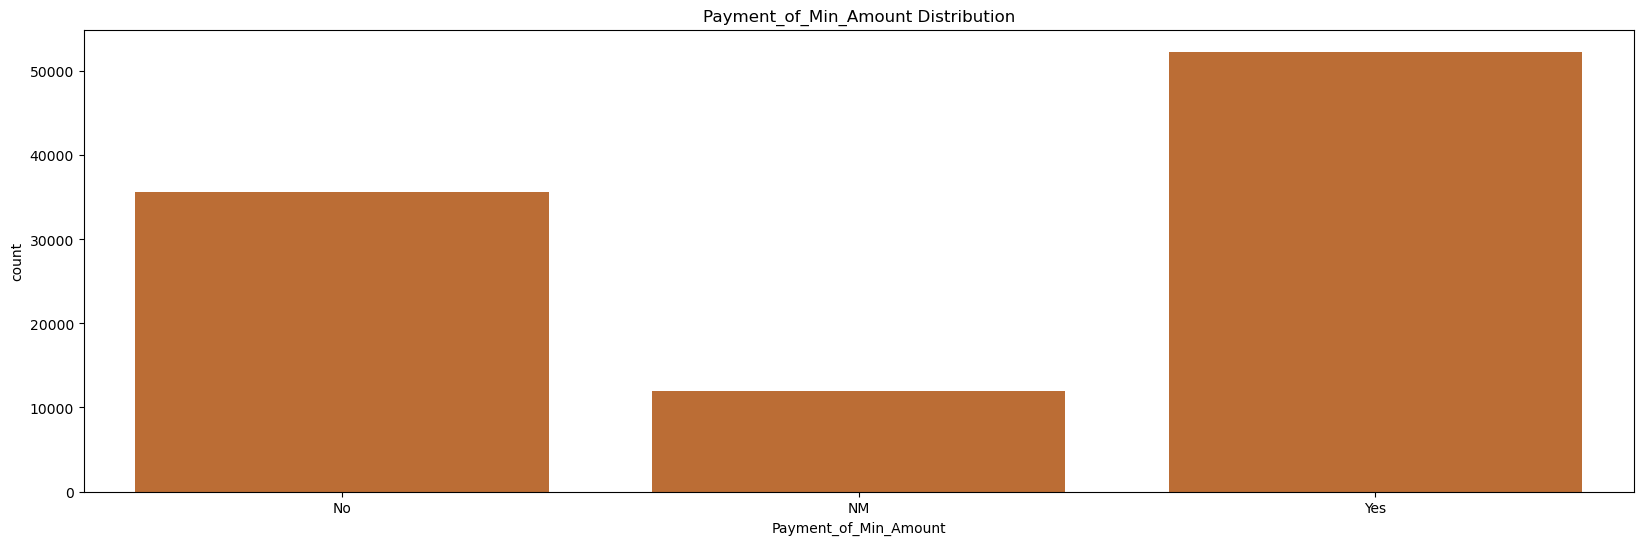

In [16]:
# Display countplots for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(20,6))
    sns.countplot(x=col, data=df, color='chocolate')
    plt.title(f'{col} Distribution')
    plt.show()

# FEATURE ENGINEEREING

In [17]:
# List of unwanted features
unwanted_features = ['ID', 'Customer_ID', 'Name', 'Age', 'SSN', 'Type_of_Loan', 'Num_Credit_Inquiries']
# Drop unwanted features
df = df.drop(unwanted_features, axis=1)

In [18]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Handle outliers

In [19]:
# Find the number of outliers in each numerical column
numerical_cols = ['Month','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate', 
                  'Delay_from_due_date','Num_of_Delayed_Payment','Num_of_Loan','Changed_Credit_Limit', 
                  'Credit_Utilization_Ratio','Outstanding_Debt','Credit_History_Age',
                  'Total_EMI_per_month', 'Amount_invested_monthly']

In [20]:
num_outliers = []
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)].shape[0]
    num_outliers.append(outliers)

print("Number of outliers in each column:")
for i, col in enumerate(numerical_cols):
    print(f"{col}: {num_outliers[i]} outliers detected")

Number of outliers in each column:
Month: 0 outliers detected
Annual_Income: 2000 outliers detected
Monthly_Inhand_Salary: 2017 outliers detected
Num_Bank_Accounts: 0 outliers detected
Num_Credit_Card: 0 outliers detected
Interest_Rate: 0 outliers detected
Delay_from_due_date: 4002 outliers detected
Num_of_Delayed_Payment: 0 outliers detected
Num_of_Loan: 0 outliers detected
Changed_Credit_Limit: 579 outliers detected
Credit_Utilization_Ratio: 4 outliers detected
Outstanding_Debt: 5272 outliers detected
Credit_History_Age: 0 outliers detected
Total_EMI_per_month: 5044 outliers detected
Amount_invested_monthly: 4464 outliers detected


In [21]:
# Cap outlier values
# Calculate the upper and lower limits for outlier capping
upper_limits = {}
lower_limits = {}
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_limits[col] = q3 + 1.5 * iqr
    lower_limits[col] = q1 - 1.5 * iqr

# Cap outlier values
for col in numerical_cols:
    df[col] = np.where(df[col] > upper_limits[col], upper_limits[col], df[col])
    df[col] = np.where(df[col] < lower_limits[col], lower_limits[col], df[col])

In [22]:
# Display the remaining outliers after processing
print("\nOutliers after processing:")
num_outliers = []
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)].shape[0]
    num_outliers.append(outliers)

print("Number of outliers in each column:")
for i, col in enumerate(numerical_cols):
    print(f"{col}: {num_outliers[i]} outliers detected")


Outliers after processing:
Number of outliers in each column:
Month: 0 outliers detected
Annual_Income: 0 outliers detected
Monthly_Inhand_Salary: 0 outliers detected
Num_Bank_Accounts: 0 outliers detected
Num_Credit_Card: 0 outliers detected
Interest_Rate: 0 outliers detected
Delay_from_due_date: 0 outliers detected
Num_of_Delayed_Payment: 0 outliers detected
Num_of_Loan: 0 outliers detected
Changed_Credit_Limit: 0 outliers detected
Credit_Utilization_Ratio: 0 outliers detected
Outstanding_Debt: 0 outliers detected
Credit_History_Age: 0 outliers detected
Total_EMI_per_month: 0 outliers detected
Amount_invested_monthly: 0 outliers detected


# One-hot encoding

In [23]:
# One-hot encoding
categorical_cols = ['Occupation','Delay_from_due_date', 'Num_of_Delayed_Payment',
                    'Credit_Mix','Payment_Behaviour','Payment_of_Min_Amount']

In [24]:
df = pd.get_dummies(df, columns=categorical_cols)

# Label Encoding

In [25]:
# Label Encoding
target_column = 'Credit_Score'
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])
labels_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding:")
for label, code in labels_mapping.items():
    print(f"{label}: {code}")

Label Encoding:
Good: 0
Poor: 1
Standard: 2


# MODEL SELECTION AND TRAINING

In [26]:
# Divide the data into training, validation, and testing sets
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [27]:
# Display the first few rows of the transformed dataset
X_train.head()

,Month,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,...,Credit_Mix_Standard,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
92471,1.527525,1.027850,0.988250,-1.684656,-0.741899,-1.319266,-0.217827,-0.815548,-1.193042,1.722859,...,0,1,0,0,0,0,0,0,1,0
41876,0.218218,-0.306918,-0.379759,-1.684656,-0.258126,-0.861667,0.190946,-0.768646,-1.232587,-1.132556,...,0,0,0,0,1,0,0,0,1,0
41441,-1.091089,-0.443534,-0.413660,0.243389,1.676963,0.968727,1.417266,-0.043925,0.274611,0.254087,...,1,0,0,1,0,0,0,0,0,1
71696,-1.527525,-0.309015,-0.231534,-0.527829,-0.258126,-1.319266,-1.035374,-1.012236,-0.687312,-0.113464,...,0,0,0,1,0,0,0,0,1,0
17547,-0.218218,-0.900565,-0.877085,0.628997,0.225646,1.655125,2.234812,-0.151347,-0.126576,0.984647,...,0,0,1,0,0,0,0,1,0,0



Random Forest Classifier Accuracy: 80.42%

Confusion Matrix:
[[2688   10  829]
 [ 120 4723 1031]
 [ 758 1167 8674]]


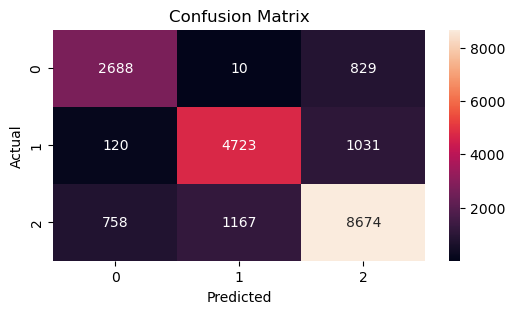


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      3527
           1       0.80      0.80      0.80      5874
           2       0.82      0.82      0.82     10599

    accuracy                           0.80     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000



In [28]:
# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict the target variable for X_test
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("\nRandom Forest Classifier Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Display confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for precision, recall, f1-score
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Logistic Regression Accuracy: 65.72%

Confusion Matrix (Logistic Regression):
[[2284  153 1090]
 [ 491 3251 2132]
 [1362 1627 7610]]


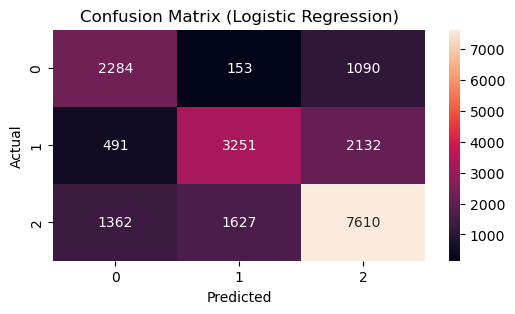


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.55      0.65      0.60      3527
           1       0.65      0.55      0.60      5874
           2       0.70      0.72      0.71     10599

    accuracy                           0.66     20000
   macro avg       0.63      0.64      0.63     20000
weighted avg       0.66      0.66      0.66     20000



In [29]:
# Initialize the LogisticRegression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model
lr_model.fit(X_train, y_train)

# Predict the target variable for X_test
y_test_pred_lr = lr_model.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
print("\nLogistic Regression Accuracy: {:.2f}%".format(accuracy_lr * 100))

# Calculate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)

# Print confusion matrix
print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix_lr)

# Display confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d')
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for precision, recall, f1-score
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_test_pred_lr))


Decision Tree Accuracy: 72.78%

Confusion Matrix (Decision Tree):
[[2301  181 1045]
 [ 156 4140 1578]
 [1030 1455 8114]]


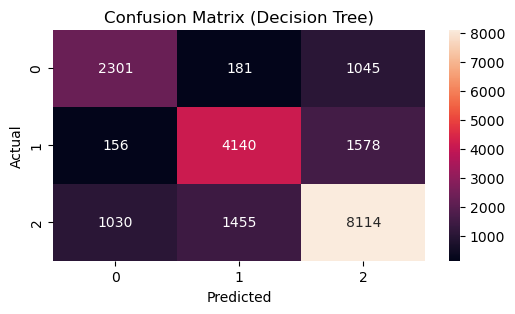


Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.66      0.65      0.66      3527
           1       0.72      0.70      0.71      5874
           2       0.76      0.77      0.76     10599

    accuracy                           0.73     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.73      0.73      0.73     20000



In [30]:
# Initialize the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Predict the target variable for X_test
y_test_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print("\nDecision Tree Accuracy: {:.2f}%".format(accuracy_dt * 100))

# Calculate confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)

# Print confusion matrix
print("\nConfusion Matrix (Decision Tree):")
print(conf_matrix_dt)

# Display confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d')
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for precision, recall, f1-score
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_test_pred_dt))


K-Nearest Neighbors Accuracy: 73.43%

Confusion Matrix (K-Nearest Neighbors):
[[2445  120  962]
 [ 396 4108 1370]
 [1100 1365 8134]]


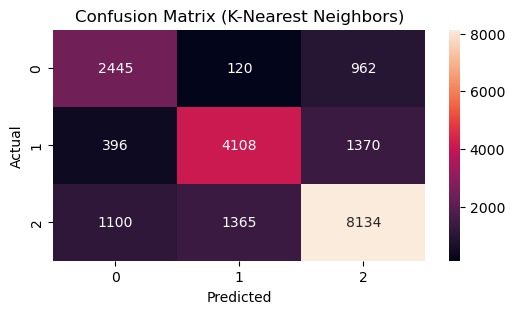


Classification Report (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      3527
           1       0.73      0.70      0.72      5874
           2       0.78      0.77      0.77     10599

    accuracy                           0.73     20000
   macro avg       0.71      0.72      0.71     20000
weighted avg       0.74      0.73      0.74     20000



In [31]:
# Initialize the KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Fit the model
knn_model.fit(X_train, y_train)

# Predict the target variable for X_test
y_test_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print("\nK-Nearest Neighbors Accuracy: {:.2f}%".format(accuracy_knn * 100))

# Calculate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)

# Print confusion matrix
print("\nConfusion Matrix (K-Nearest Neighbors):")
print(conf_matrix_knn)

# Display confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d')
plt.title('Confusion Matrix (K-Nearest Neighbors)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for precision, recall, f1-score
print("\nClassification Report (K-Nearest Neighbors):")
print(classification_report(y_test, y_test_pred_knn))


Support Vector Machine Accuracy: 71.70%

Confusion Matrix (Support Vector Machine):
[[2495   63  969]
 [ 446 3834 1594]
 [1320 1268 8011]]


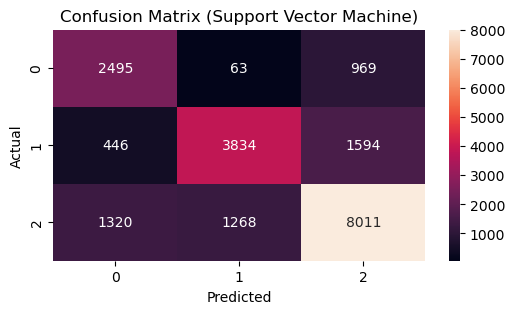


Classification Report (Support Vector Machine):
              precision    recall  f1-score   support

           0       0.59      0.71      0.64      3527
           1       0.74      0.65      0.69      5874
           2       0.76      0.76      0.76     10599

    accuracy                           0.72     20000
   macro avg       0.70      0.71      0.70     20000
weighted avg       0.72      0.72      0.72     20000



In [32]:
# Initialize the SVC model
svm_model = SVC(random_state=42)

# Fit the model
svm_model.fit(X_train, y_train)

# Predict the target variable for X_test
y_test_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
print("\nSupport Vector Machine Accuracy: {:.2f}%".format(accuracy_svm * 100))

# Calculate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)

# Print confusion matrix
print("\nConfusion Matrix (Support Vector Machine):")
print(conf_matrix_svm)

# Display confusion matrix using a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d')
plt.title('Confusion Matrix (Support Vector Machine)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for precision, recall, f1-score
print("\nClassification Report (Support Vector Machine):")
print(classification_report(y_test, y_test_pred_svm))

# Model Evaluation

In [ ]:
# Function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict the target variable for X_test
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"\n{model_name} Accuracy: {accuracy * 100:.2f}%")


# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test, model_name)

# Model Selection

In [35]:
import pickle

# Assuming RandomForestClassifier is the best model
best_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model with the entire training data
best_model.fit(X_train, y_train)

# Save the model to a pickle file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully.")


Model saved successfully.


In [36]:
# Load the model from the pickle file
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully.")


Model loaded successfully.
